### Classifier using twenty timesteps 
#### rows 0-19, ~260.1 years

In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier

In [2]:
planets = pd.read_csv('20ts.csv', skipinitialspace=True)
print(planets.columns)

Index(['run', 'planet', 'initial e', 'final e', 'mean e', 'min e', 'max e',
       'sd e', 'initial pericenter', 'final pericenter', 'mean pericenter',
       'min pericenter', 'max pericenter', 'sd pericenter', 'initial jacobi',
       'final jacobi', 'mean jacobi', 'min jacobi', 'max jacobi', 'sd jacobi',
       'initial mhr1', 'final mhr1', 'mean mhr1', 'min mhr1', 'max mhr1',
       'sd mhr1', 'initial mhr2', 'final mhr2', 'mean mhr2', 'min mhr2',
       'max mhr2', 'sd mhr2', 'initial a1_ratio', 'final a1_ratio',
       'mean a1_ratio', 'min a1_ratio', 'max a1_ratio', 'sd a1_ratio',
       'initial a2_ratio', 'final a2_ratio', 'mean a2_ratio', 'min a2_ratio',
       'max a2_ratio', 'sd a2_ratio', 'initial mass1_ratio',
       'final mass1_ratio', 'mean mass1_ratio', 'min mass1_ratio',
       'max mass1_ratio', 'sd mass1_ratio', 'initial mass2_ratio',
       'final mass2_ratio', 'mean mass2_ratio', 'min mass2_ratio',
       'max mass2_ratio', 'sd mass2_ratio', 'end time', 'fate'],


###### Classifies as type of instability (ejection, remaining, planet-planet collision, central body collision).

> Is currently ~64% accurate

In [ ]:
fates = list(set(planets['fate']))
types = {fates[i] : i for i in range(len(fates))}
int_dict = {i : fates[i] for i in range(len(fates))}
classes = planets['fate'].map(types)

###### Classifies as either stable or unstable.
> Is currently 84% accurate

Second cell is the hard coded version

In [ ]:
fates = np.sort(list(set(planets['fate']))) [::-1]

types = {fates[i] : i for i in range(len(fates))}

classes = planets['fate'].map(types)

for i in range(len(classes)):
    if classes[i] == 0:
        pass
    else:
        classes[i] = 1

In [3]:
fates = list(set(planets['fate']))

types = {fates[i] : i for i in range(len(fates))}

classes = []

for i in range(len(planets['fate'])):
    if planets['fate'][i] == "remaining":
        classes += [0]
    else:
        classes += [1]
        
classes = np.array(classes)

###### Training

In [4]:
features_train, features_test, classes_train, classes_test = train_test_split(planets, classes, test_size=0.3, random_state=7)

ids_train = features_train['planet'].to_numpy()
features_train.drop(['run', 'planet', 'fate', 'end time'], axis=1, inplace=True)

cols = features_train.columns
features_train = features_train.to_numpy()

ids_test = features_test['planet'].to_numpy()
features_test.drop(['run', 'planet', 'fate', 'end time'], axis=1, inplace=True)
features_test = features_test.to_numpy()

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [5]:
classifier = GradientBoostingClassifier(random_state=7)
classifier.fit(features_train, classes_train)

GradientBoostingClassifier(random_state=7)

In [6]:
classes_predict = classifier.predict( features_test )
print('Classifier is ', accuracy_score(classes_test, classes_predict) * 100, '% accurate on testing set' )

Classifier is  84.0 % accurate on testing set


###### Feature importance

In [7]:
feats=classifier.feature_importances_
inds=np.argsort(feats)[::-1]

for i in range(len(inds)):
    print(cols[inds[i]], feats[inds[i]])

sd e 0.24625006780453154
initial a2_ratio 0.12023936362423619
mean mass2_ratio 0.056320616401938736
final mass2_ratio 0.045755641816739995
initial jacobi 0.03551885618359411
initial mass2_ratio 0.031024565928152135
initial mhr1 0.02799911503314224
max a2_ratio 0.02783776171784983
final mass1_ratio 0.02424963869999756
sd jacobi 0.024152216933346134
min mass1_ratio 0.02316615730472054
max mass1_ratio 0.022041141169481956
initial a1_ratio 0.02149561261546019
min pericenter 0.02000268315953244
sd pericenter 0.018098975728350255
mean mass1_ratio 0.017225717790971477
final a2_ratio 0.013947489129770483
max a1_ratio 0.013437530751096261
mean a2_ratio 0.013400136802815979
mean mhr2 0.012911443906491635
max e 0.012299475019793045
mean jacobi 0.012265935633035326
sd a2_ratio 0.01139690315969144
max mhr2 0.009890769057178022
initial mhr2 0.009760645574916169
max mass2_ratio 0.009073838739495972
mean e 0.008473589533011049
final mhr2 0.007578418621527701
sd mhr2 0.007126401054682233
max jacobi 0.0

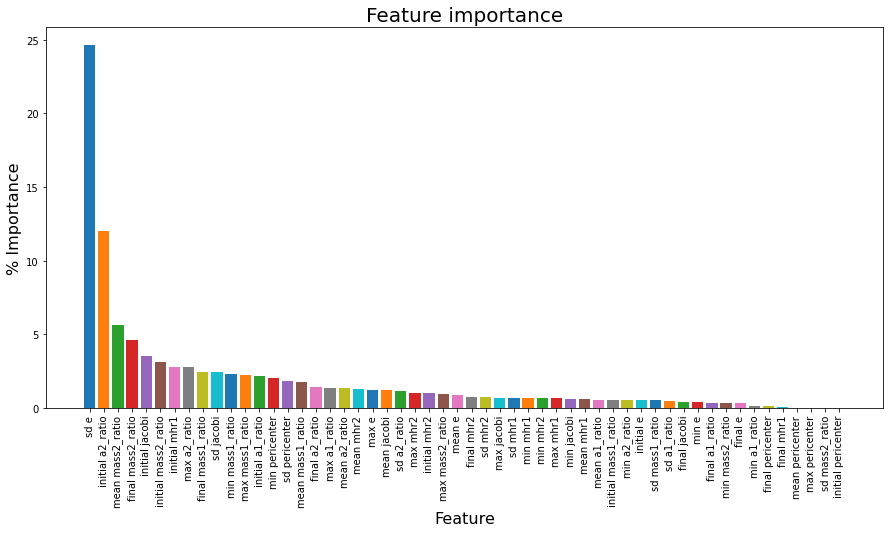

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pylab


f=plt.figure(figsize=(15,7))

for i in range(len(inds)):
    plt.bar(cols[inds[i]], feats[inds[i]] * 100)
    

 
plt.ylabel('% Importance', size=16)
plt.xlabel('Feature', size=16)
plt.title('Feature importance', size=20)
plt.xticks(rotation = 90)
plt.show()

Text(0.5, 1.0, 'Eccentricity standard deviation')

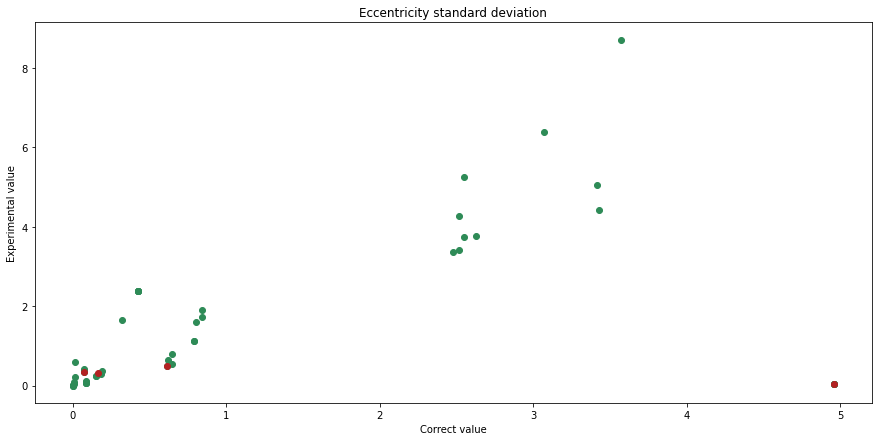

In [9]:
f=plt.figure(figsize=(15,7))


for i in range(0,54):
    if (classes_test[i] == classes_predict[i]):
        plt.scatter(features_test[5][i], features_train[5][i], color = 'seagreen')
    else:
        plt.scatter(features_test[5][i], features_train[5][i], color = 'firebrick', zorder = 2)
        
plt.ylabel('Experimental value')
plt.xlabel('Correct value')
plt.title('Eccentricity standard deviation')

Text(0.5, 1.0, 'Initial semi-major axis 2 ratio')

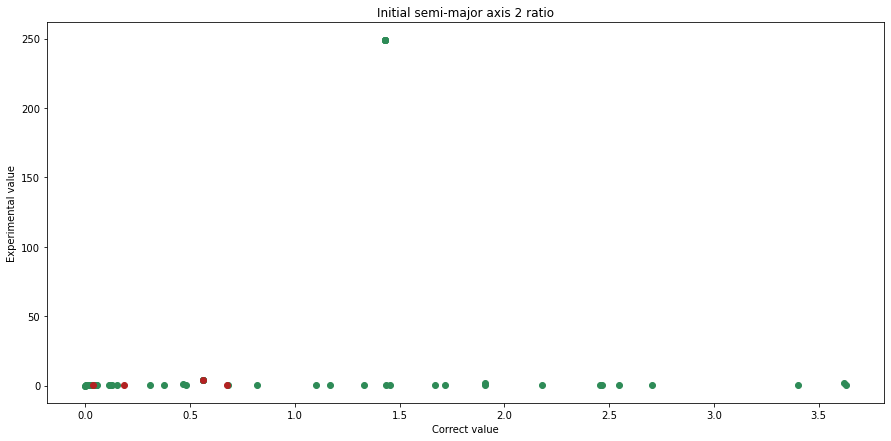

In [10]:
f=plt.figure(figsize=(15,7))


for i in range(0,54):
    if (classes_test[i] == classes_predict[i]):
        plt.scatter(features_test[36][i], features_train[36][i], color = 'seagreen')
    else:
        plt.scatter(features_test[36][i], features_train[36][i], color = 'firebrick', zorder = 2)
        
plt.ylabel('Experimental value')
plt.xlabel('Correct value')
plt.title('Initial semi-major axis 2 ratio')

Text(0.5, 1.0, 'Mean mass 2 ratio')

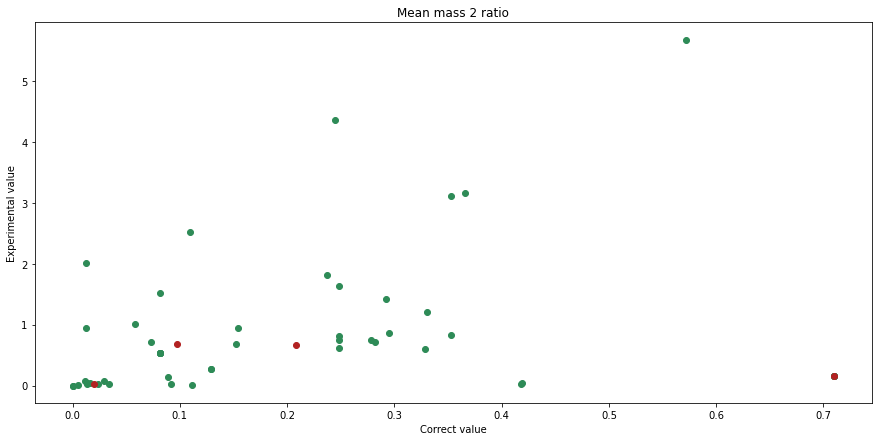

In [11]:
f=plt.figure(figsize=(15,7))


for i in range(0,54):
    if (classes_test[i] == classes_predict[i]):
        plt.scatter(features_test[50][i], features_train[50][i], color = 'seagreen')
    else:
        plt.scatter(features_test[50][i], features_train[50][i], color = 'firebrick', zorder = 2)
        
plt.ylabel('Experimental value')
plt.xlabel('Correct value')
plt.title('Mean mass 2 ratio')